In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Tensors

In [2]:
x = np.arange(12).reshape(2,2,3)
x

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])

In [3]:
x.shape

(2, 2, 3)

In [4]:
x.ndim

3

In [5]:
np.ndim(np.array([1,2,3]))

1

# Slicing

In [25]:
print(x[0,0,:])
print(x[1,0,::2])
print(x[:,1,1])
print(x[1,1,::-1])
print(x[x>6])
print(x[(x>3) & (x<10)])

[0 1 2]
[6 8]
[ 4 10]
[11 10  9]
[ 7  8  9 10 11]
[4 5 6 7 8 9]


`START:END:STEP`

# Tensor ops

In [26]:
x = np.arange(24).reshape(2,12)
y = np.arange(36).reshape(3,1,12)
z = np.arange(12).reshape(2,3,2)

In [34]:
print((x+y).shape)
print((x+z[:,:,:,None]).shape) # Add a dimension to z, such that it becomes a (2,3,2,1) shape such that it can be broadcast
print((y+z[:,:,:,None]).shape)
print((x+y+z[:,:,:,None]).shape)

(3, 2, 12)
(2, 3, 2, 12)
(2, 3, 2, 12)
(2, 3, 2, 12)


In [35]:
x = np.random.normal(0,1,size=20)
y = np.random.normal(0,1,size=20)
z = np.random.choice(3,size=20,replace=True)

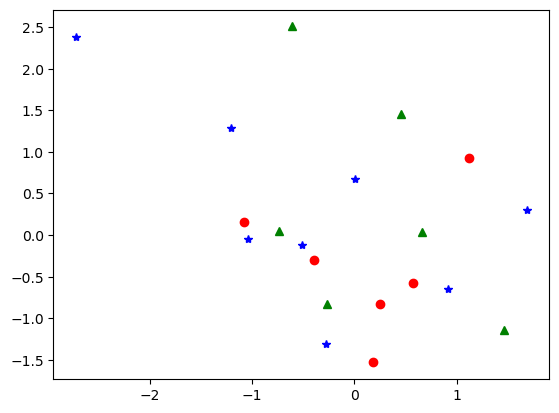

In [42]:
colors = ['ro', 'b*', 'g^']

for i in np.arange(len(x)):
    plt.plot(x[i], y[i], colors[z[i]])



# First neural network

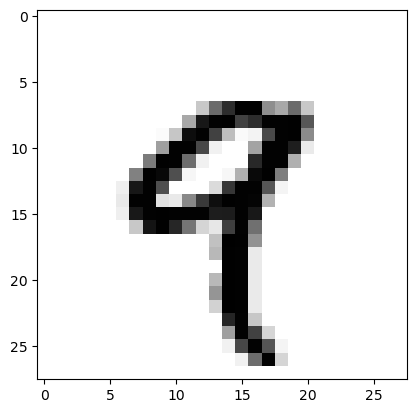

9


In [43]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
plt.imshow(train_images[4],cmap=plt.cm.binary)
plt.show()
print(train_labels[4])

In [44]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 2.7331 - accuracy: 0.8604
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3795 - accuracy: 0.9124
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2916 - accuracy: 0.9276
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2497 - accuracy: 0.9384
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2277 - accuracy: 0.9438


In [45]:
predictions = model.predict(test_images)
predictions[0]

313/313 [==============================] - 2s 5ms/step


array([3.0218668e-19, 5.0626698e-09, 5.2039091e-15, 1.1883319e-14,
       8.0594004e-12, 1.5837359e-09, 4.0543602e-20, 9.9999994e-01,
       9.1327270e-15, 1.3503614e-09], dtype=float32)

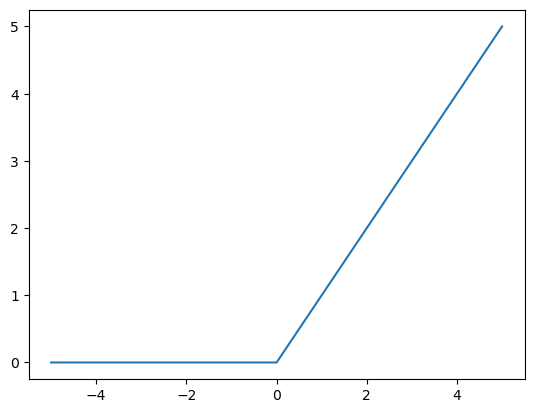

In [46]:
def relu(x):
    return np.clip(x,0,np.inf)

range_x = np.arange(-5,6,1)
plt.plot(range_x, [relu(x) for x in range_x])

In [50]:
def softmax(x):
    return [np.exp(x[i])/np.sum(np.exp(x)) for i in range(len(x))]

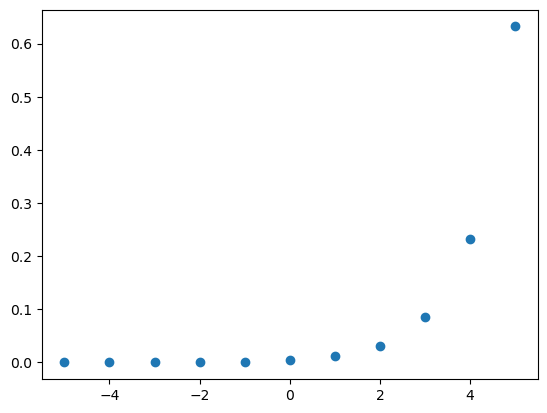

In [51]:
plt.scatter(range_x, softmax(range_x))

In [52]:
np.sum(softmax(range_x))

1.0

In [54]:
softmax(range_x)

[2.8698708289478113e-05,
 7.801117724353531e-05,
 0.00021205636551779986,
 0.0005764289649961046,
 0.0015668963809463664,
 0.004259265959404749,
 0.01157788526002411,
 0.03147195511430737,
 0.08554964369330044,
 0.23254804188264452,
 0.6321311164933255]

In [56]:
test_labels[0]

7

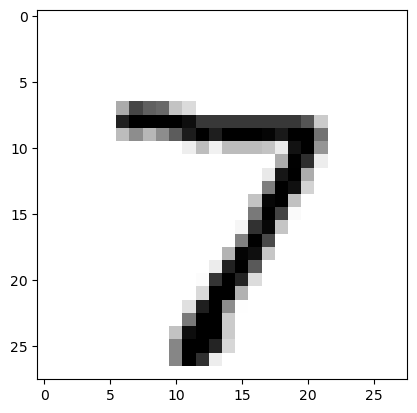

In [57]:
plt.imshow(test_images[0], cmap=plt.cm.binary)
plt.show()